# Example Data Visualization for Roman Amphitheaters

In [1]:
import csv
import json
import pandas as pd

with open("roman-amphitheaters.geojson") as f:
    j = json.load(f)

d = []
for feature in j['features']:

    if 'capacity' in feature['properties'].keys():
        capacity = feature['properties']['capacity']['quantity']
    else:
        capacity = None
        
    if 'dimensions' in feature['properties'].keys():
        dimensions = feature['properties']['dimensions']
        
            
        if 'exteriormajor' in dimensions.keys():
            extmajor = dimensions['exteriormajor']
        else:
            extmajor = None
            
        if 'exteriorminor' in dimensions.keys():
            extminor = dimensions['exteriorminor']
        else:
            extminor = None
            
    d.append((feature['id'],
              capacity,
              feature['properties']['moderncountry'],
              extmajor,
              extminor))

df = pd.DataFrame(d, columns=('id','capacity','modcountry','extmajor','extminor'), dtype=float)

df.to_csv("roman-amphitheaters.csv", index = False, quoting = csv.QUOTE_NONNUMERIC)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
sums = df.groupby(by='modcountry').sum().query('capacity > 10000')

sums.head(3)

,capacity,extmajor,extminor
modcountry,,,
Albania,20000.0,132.4,113.2
Algeria,42702.0,614.9,444.8
Austria,23729.0,601.0,428.0


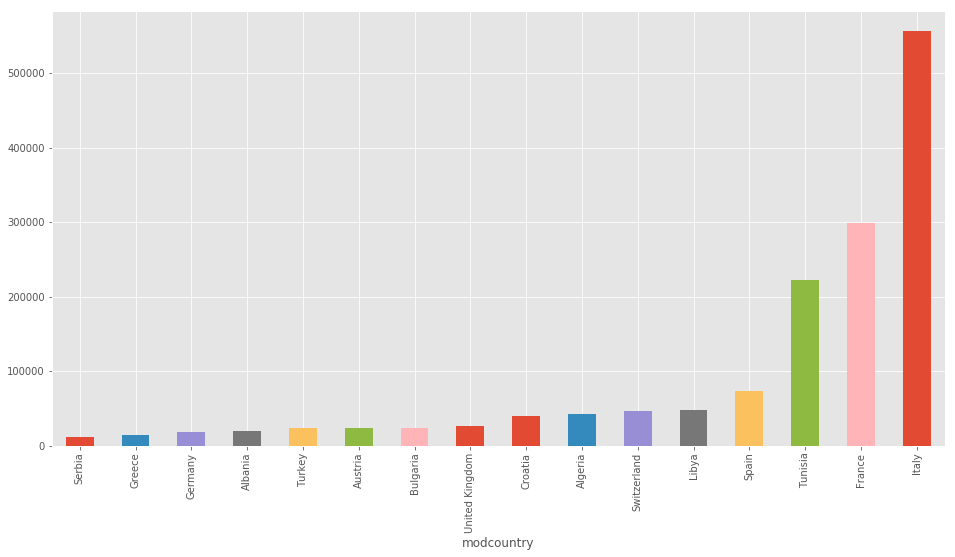

In [15]:
sums = df.groupby(by='modcountry').sum().query('capacity > 10000')

sums.sort_values(by = 'capacity').capacity.plot.bar(figsize=(16,8))

plt.savefig('fig08.png')

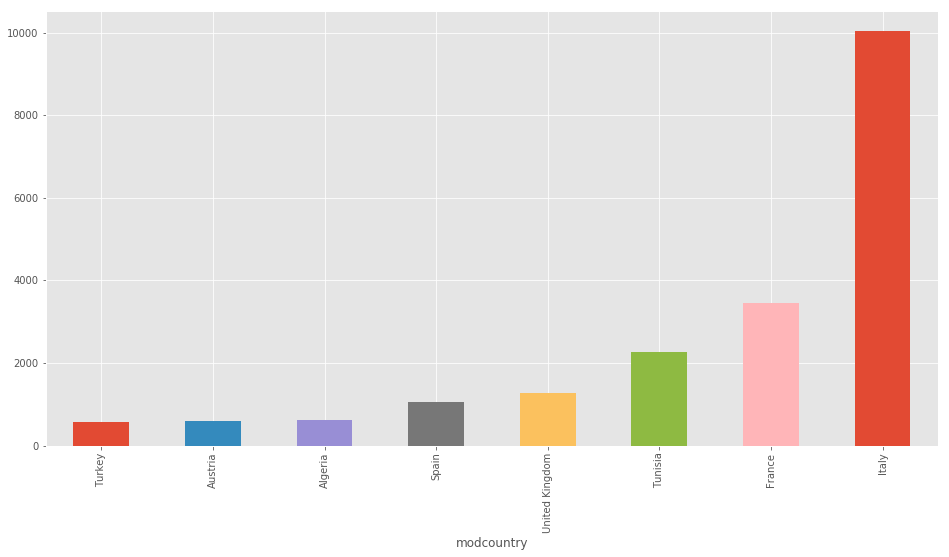

In [16]:
sums = df.groupby(by='modcountry').sum().query('extmajor > 500')
 
sums.sort_values(by = 'extmajor').extmajor.plot.bar(figsize=(16,8))

plt.savefig('fig09.png')